In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


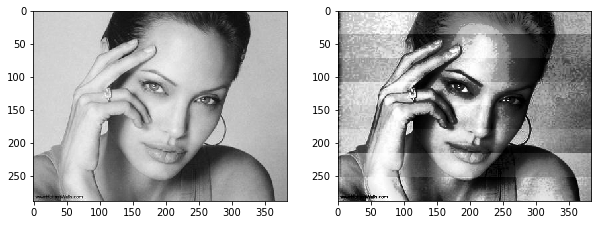

In [12]:
def normalized_histogram(img):
  H = np.zeros((256))
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      H[img[i,j]] += 1
  H = H/(img.shape[0]*img.shape[1])
  return H

def equalize(img):
  h = normalized_histogram(img)
  A = np.zeros((256))
  A[0] = h[0]
  for i in range(1, 256):
    A[i] = A[i-1] + h[i]
  Out = np.zeros(img.shape)
  for i in range(0, img.shape[0]):
    for j in range(0, img.shape[1]):
      Out[i,j] = A[img[i,j]]
  return (255*Out).astype('uint8')

def equalize_adaptative(img):
  out = np.zeros(img.shape)
  m = img[0].size
  n = img.size//m
  x = n//8
  y = m//8
  for i in range(x):
    for j in range(y):
      sub = img[i*x:i*x+x,j:j*y+y]
      sub = equalize(sub)
      out[i*x:i*x+x,j:j*y+y] = sub
  return out

img = cv2.imread("contrast2.jpeg", 0)
out = equalize_adaptative(img)

plt.figure(figsize=[10,10])
plt.subplot(1,2,1), plt.imshow(img, cmap="gray")
plt.subplot(1,2,2), plt.imshow(out, cmap="gray")
plt.show()